In [1]:
from keylogParser import KeylogsParser, bigrams, read_file

parser = KeylogsParser(bigrams)
lines_oskar = read_file('oskar')
lines_johan = read_file('johan')
vector_oskar = parser.get_pressed_data_diffs(lines_oskar)
vector_johan = parser.get_pressed_data_diffs(lines_johan)
stats = {
	'oskar': parser.get_stats(vector_oskar),
	'johan': parser.get_stats(vector_johan)
}

# print(stats)
# for bigram in vector:
# 	print(bigram, vector[bigram])

# pressed_data_diffs = parser.get_pressed_data_diffs()
# print(pressed_data_diffs)


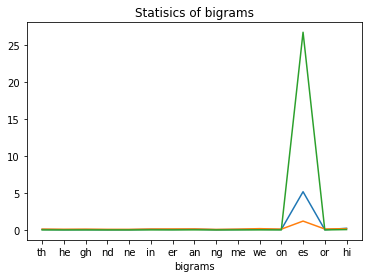

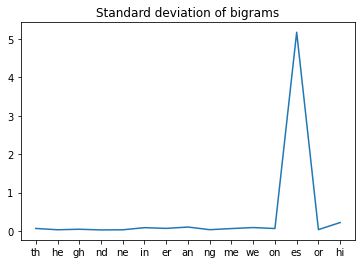

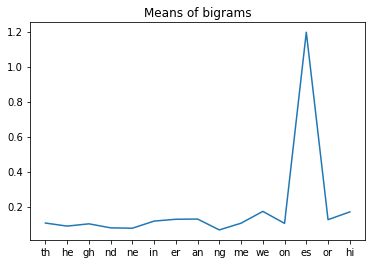

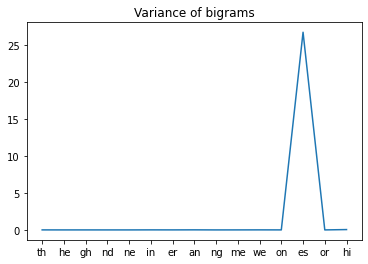

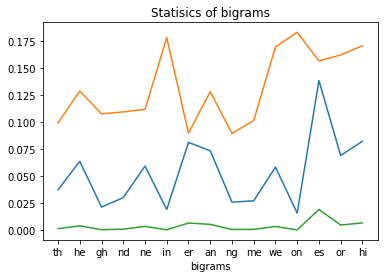

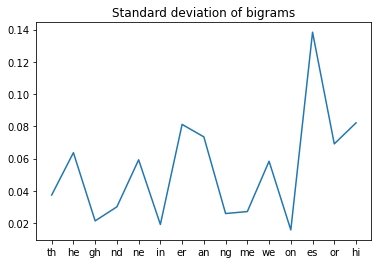

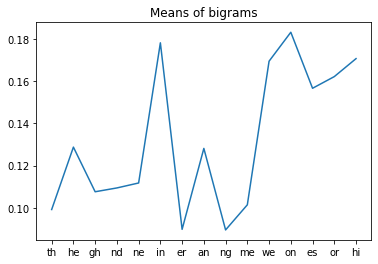

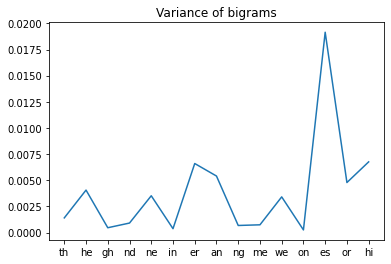

In [3]:
parser.print_graph(stats['oskar'])
parser.print_graph(stats['johan'])